# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [10]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
print("Data loaded")

Data loaded


In [11]:
### To start off let's do a basic data summary.
import numpy as np

# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
# This is a pickled dataset in which we've already resized the images to 32x32
image_width = 32
image_height = 32
color_channels = 3
image_shape = [None, image_width, image_height, color_channels]

# TODO: how many classes are in the dataset
# we can get the number of classes from the testing set, like this:
all_classes = np.unique(test['labels'])
n_classes = len(all_classes)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = [None, 32, 32, 3]
Number of classes = 43


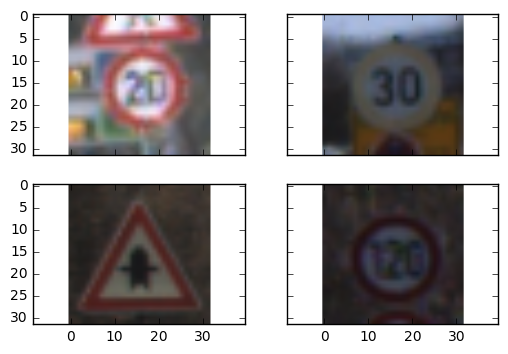

In [12]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

# get 4 images from the dataset and display them
# Do relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#makes sure the plt is dispayed inline with the output of the notebook
%matplotlib inline 

#debug only ------------------------------------------------------------------------------
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.imshow(X_train[1]);
ax2.imshow(X_train[2290]);
ax3.imshow(X_test[4]);
ax4.imshow(X_test[228]);
# end debug -------------------------------------------------------------------------------

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

0.960515625
-0.76384375


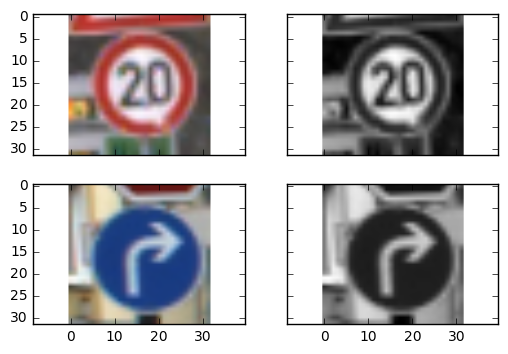

In [13]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# convert images to grayscale
# the best way is to convert to YUV and then take the Y

# using the scikit-image, which provides some functions to convert an image in ndarray, like rgb2gray
#from skimage import color

import numpy as np
from numpy import newaxis
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])


# convert train data to grayscale to reduce complexity and make the mean zero
X_train_gray = []
for image in X_train:
    #X_train_gray.append(color.rgb2gray(image)-0.5);
    X_train_gray.append((rgb2gray(image)-128)/128,);

#X_train_gray = X_train_gray[...,newaxis]
#do the same for the test data
X_test_gray = []
for image in X_test:
    #X_test_gray.append(color.rgb2gray(image)-0.5);
    X_test_gray.append((rgb2gray(image)-128)/128,);
#X_test_gray = X_test_gray[...,newaxis]

# debug only ------------------------------------------------------------------------------
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# train image before example
ax1.imshow(X_train[13]);
# train image after example
ax2.imshow(X_train_gray[13]+0.5, cmap='gray');
# test image before example
ax3.imshow(X_test[21]);
# test image after example
ax4.imshow(X_test_gray[21]+0.5, cmap='gray');
print(np.max(X_test_gray[21]))
print(np.min(X_test_gray[21]))
# end debug -------------------------------------------------------------------------------

### Question 1 

_Describe the techniques used to preprocess the data._

The convertion to grayscale images reduces the complexity of the data while retaining the interesting features like shapes and symbols. If we, humans are able to label the traffic sign with this reduced information, we expect the neural network to be also able to do it. In fact reducing the dimensionality from 3 colors to 1, besides making it much more efficient and easier to train, can potentially increase the performance as the color was a redundant variable causing "distraction". The structure of the data is kept and complexity is reduced.

The function used to convert to grayscale (skimage.color.rgb2grey(rgb)[source]) outputs a luminance value which is normalised between 0 and 1. In order to further improve the preprocessing of the dataset, the mean was brought to about zero by subtracting 0.5.

Other methods could be used to preprocess the data such as adjusting the contrast and brightness or aplying Gaussian blur, but I'm not sure if that would really be of benefit to the CNN. As such I decided to use just the simplest and probably the most useful techniques: RGB to grayscale convertion and zero mean.

**Answer:**

In [14]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**
I would separate the data in 3 sets and use as a validation set about 30 images, as the rule of thumb provided in the classes.
The training set would be the largest set representing at least 70% of the total images collected.
The testing data would be bigger than the validation set and should account for almost 30% of the total dataset.
I would have to set correct labels for all the images in the dataset and save those labels together with the image (e.g. in the filename itself).
All the images of the dataset should be of equal size and in order to be able to use them together with the provided dataset they should use that same size (32x32) and image color depth (3).
As before, these images should then undergo the same preprocessing techniques, rgb to grayscale conversion and make the mean zero.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [15]:
# define and test the next_batch function
# this function assumes both arrays are the same length
def next_batch(first_array, second_array, batch_size):
    index = np.random.choice(len(first_array), size=batch_size, replace=False)
    
    result_x = []
    result_y = []
    for id in index:
        result_x.append(first_array[id])
        result_y.append(second_array[id])
    return result_x, result_y
    
A = [1,2,3,4,5,6,7,8,9,13]
B = [11,22,33,44,55,66,77,88,99,31]
a,b = next_batch(A,B,4)
print (a,'\n',b)

[6, 9, 4, 5] 
 [66, 99, 44, 55]


In [16]:
# test one_hot encoder (from Confluence page by Mihail Chirita)
def one_hot_encoder(original_labels, number_of_classes):
    encoded_labels = np.zeros((len(original_labels), number_of_classes))
    for i in range(len(original_labels)):
        encoded_labels[i, original_labels[i]] = 1.
    return encoded_labels

A = [1,4,5,2,7]
B = one_hot_encoder(A,8)
print(A)
print(B)

[1, 4, 5, 2, 7]
[[ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]]


In [17]:
### Train your model here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

#Parameters
learning_rate = 0.001
training_iters = 15
batch_size = 128
display_step = 1

# Network Parameters
n_input = image_width * image_height  # 1024 traffic data input (img shape: 32*32)
#n_classes = 43  # total classes previously defined
dropout = 0.75 # Dropout, probability to keep units
n_classes = 43


layer_width = {
    'layer_1': 32,
    'layer_2': 64,
    'layer_3': 128,
    'fully_connected': 256
}

stddev = 0.01
weights = {
    'layer_1': tf.Variable(tf.truncated_normal(
        [5, 5, 1, layer_width['layer_1']]),stddev),
    'layer_2': tf.Variable(tf.truncated_normal(
        [5, 5, layer_width['layer_1'], layer_width['layer_2']]),stddev),
    'layer_3': tf.Variable(tf.truncated_normal(
        [5, 5, layer_width['layer_2'], layer_width['layer_3']]),stddev),
    'fully_connected': tf.Variable(tf.truncated_normal(
        #[1024, layer_width['fully_connected']])),
        [2048, layer_width['fully_connected']]),stddev),
    'out': tf.Variable(tf.truncated_normal(
        [layer_width['fully_connected'], n_classes]),stddev)
}

shift = 0.05
biases = {
    'layer_1': tf.Variable(tf.zeros(layer_width['layer_1'])+shift),
    'layer_2': tf.Variable(tf.zeros(layer_width['layer_2'])+shift),
    'layer_3': tf.Variable(tf.zeros(layer_width['layer_3'])+shift),
    'fully_connected': tf.Variable(tf.zeros(layer_width['fully_connected'])+shift),
    'out': tf.Variable(tf.zeros(n_classes)+shift)
}


# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x,
                          ksize=[1, k, k, 1],
                          strides=[1, k, k, 1],
                          padding='SAME')

# Create model
def conv_net(x, weights, biases):
    # Reshape input picture
    #x = tf.reshape(x, shape=[1, 32, 32, 1])

    # Convolution Layer
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)
    
    # Convolution Layer
    conv3 = conv2d(conv2, weights['layer_3'], biases['layer_3'])
    # Max Pooling (down-sampling)
    conv3 = maxpool2d(conv3, k=2)

    
    # Fully connected layer
    # Reshape conv3 output to fit fully connected layer input
    fc1 = tf.reshape(conv3, [-1, weights['fully_connected'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['fully_connected']), biases['fully_connected'])
    fc1 = tf.nn.relu(fc1)
    
    # Apply Dropout
    #fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

print ("Model created")

Model created


In [18]:
# --------------------------------------------------------------

# tf Graph input
x = tf.placeholder("float", [None, 32, 32, 1])
y = tf.placeholder("float", [None, n_classes])
#keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)

logits = conv_net(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)\
    .minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

print ("All set. Ready to run.")

All set. Ready to run.


In [ ]:
# Session
# Now let's run it
print ("Training the network. This might take a few minutes...")

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_iters):
        total_batch = int(n_train/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = next_batch(X_train_gray, y_train, batch_size)
            batch_x = np.reshape(batch_x, (batch_size,32,32,1))
            #need to apply one_hot to the batch_y
            batch_y = one_hot_encoder(batch_y, n_classes)

            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
            
        # Display logs per epoch step
        c = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))
    print("Optimization Finished!")
    
    # Save the variables to disk.
    save_path = saver.save(sess, "model.ckpt")
    print("Model saved in file: %s" % save_path)

Training the network. This might take a few minutes...


In [31]:
 # Test model
    #correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    # Calculate accuracy
    #accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    #print(
    #    "Accuracy:",
    # we might need to do
    # test_data = np.reshape(X_test_gray, (None,32,32,1))
    # y_test = one_hot_encoder(y_test, n_classes)
    #    accuracy.eval({x: test_data, y: test_labels}))

 Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.